<a href="https://colab.research.google.com/github/maxashoka3/C-Project/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Airbnb EDA Project By:**
* Ashokanand Chaudhary
* Alok Bhoi
* Madhusudan Mahapatra 
* Akshay Kamkhalia

**Contibution of the Team:**
Each and every member of the team have equally contributed their hardwork and dedication toward the project because we believed in **Team effort** so we have not counted the contribution of the each member but as the **Team Work**

**5 Segments of Notebook:**
1. Importing Libraries
2. Loading the Airbnb Dataset
3. Data Cleaning
4. Data Analysis and Visualization
5. Conclusion




In [177]:
#importing important library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

###### *Reading dataset from google drive*

In [178]:
#reading dataset
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/EDA project - airbnb/Copy of Airbnb NYC 2019.csv')

**Features of Dataset**

*   *id -* Reference number of the rental property/apartment assigned by Airbnb
*  *name -* Name of apartment or house 
*  *host id -* Reference number of the host or the ownwer of the property
*   *host name -* Name of the host or owner of the apartment
*  *neighbourhood group -* Name of the group of neighbourhoods
* *neighbourhood -* Name of the neighbourhod
* *latitude -* Latitude of the location of the apartment
* *longitude -* Longitude of the location of the apartment
* *room type -* Type of room that the apartment provides to rent
* *price -* Price of the room/apartment 
* *minimum nights -* Number of minimum nights a customer has to book to rent the room/apartment
* *number of reviews -* Number of total reviews the apartment/property has received
* *last reveiw -* The last date in which the apartment received a review
* *reveiws per month -* Average how many reviews the apartment gets
* *calculated host listing -* Number of Property a host has listed for rental on Airbnb
* *avalilability_365 -* Number of days a hotel/apartment is availabe in next 365 days



In [179]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [180]:
#shape of df
df.shape

(48895, 16)

In [181]:
#describtion about the dataframe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [182]:
#Descriptive analysis
print(f"Number of properties: {len(df['id'])}")

print(f"\nNumber of unique host: {len(df['host_name'].unique())}")

print(f"\nNumber of Room Type: {len(df['room_type'].unique())}")

print(f"\nNumber of neighbourhood_group:{len(df['neighbourhood_group'].unique())}")
print(f"\nNumber of neighbourhood:{len(df['neighbourhood'].unique())}")


print(f"\nAverage Price for property in all NYC: {round(df.price.mean(),2)}")


print(f"\nMaximum Price of Airbnb in NYC: {round(df.price.max(),2)}")


print(f"\nMinimum Price of Airbnb in NYC: {round(df.price.min(),2)}")


print(f"\nNumber of 0 (Zero) Price: {len(df[df['price']==0])}")

print(f"\nAverage Number of Reviews: {round(df.number_of_reviews.mean(),2)}")

Number of properties: 48895

Number of unique host: 11453

Number of Room Type: 3

Number of neighbourhood_group:5

Number of neighbourhood:221

Average Price for property in all NYC: 152.72

Maximum Price of Airbnb in NYC: 10000

Minimum Price of Airbnb in NYC: 0

Number of 0 (Zero) Price: 11

Average Number of Reviews: 23.27


In [183]:
#deleting the price with zero values
df.drop(df[(df.price <= 0) ].index , inplace=True)

In [184]:
# viewing the bottom 5 rows
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [185]:
#information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48884 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48884 non-null  int64  
 1   name                            48868 non-null  object 
 2   host_id                         48884 non-null  int64  
 3   host_name                       48863 non-null  object 
 4   neighbourhood_group             48884 non-null  object 
 5   neighbourhood                   48884 non-null  object 
 6   latitude                        48884 non-null  float64
 7   longitude                       48884 non-null  float64
 8   room_type                       48884 non-null  object 
 9   price                           48884 non-null  int64  
 10  minimum_nights                  48884 non-null  int64  
 11  number_of_reviews               48884 non-null  int64  
 12  last_review                     

In [186]:
#checking Categorical Variable
print(list(df.select_dtypes(include = 'object').columns))
#checking numerical type
print(list(df.select_dtypes(exclude = 'object').columns))

['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']
['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


#### Checking The Dublicate Value


In [187]:
#checking dublicate value in rows of dataset
df.duplicated().sum()

0

In [188]:
#checking the dublicate value in id of hotel name
df['id'].duplicated().sum()

0

In [189]:
#checking the dublicate value in name
df['name'].duplicated().sum()
#means therea are serveral hotel name with same name 

989

In [190]:
#checking duplication value in host_id

df['host_id'].duplicated().sum()

11429

In [191]:
#number of unique host 
df['host_name'].nunique()

11450

We can say that host id and 
host name have duplicate value
 But we cannot remove it Becasuse a single host can have multiple properties

#### Relation between the host_name and name(property name)

In [192]:
#checking if there is any hotel name and host name are same
df[df['host_name'] ==df['name']].count()

id                                26
name                              26
host_id                           26
host_name                         26
neighbourhood_group               26
neighbourhood                     26
latitude                          26
longitude                         26
room_type                         26
price                             26
minimum_nights                    26
number_of_reviews                 26
last_review                       12
reviews_per_month                 12
calculated_host_listings_count    26
availability_365                  26
dtype: int64

In [193]:
#getting the count of hotel with the same host name
df[df['host_name'] ==df['name']].count()

id                                26
name                              26
host_id                           26
host_name                         26
neighbourhood_group               26
neighbourhood                     26
latitude                          26
longitude                         26
room_type                         26
price                             26
minimum_nights                    26
number_of_reviews                 26
last_review                       12
reviews_per_month                 12
calculated_host_listings_count    26
availability_365                  26
dtype: int64

**Note** : 26 hotel and host name are same

In [194]:
#checking the null values and missing values in the host and hotel names
df[['host_name','name']].isna().values.any()

True

We have found out that there are several hotels and their host name which are same and even have duplicate value in them. 

---



So we need to check whether the duplicate name in host name are same person or different person

In [195]:
# taking John to look into
df.loc[df['host_name'] == 'John']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
429,148201,NYC - Sunny Greenwich Village 1br,715807,John,Manhattan,Greenwich Village,40.72831,-74.00177,Entire home/apt,175,3,18,2013-05-31,0.19,1,0
620,234870,Private Room With GREAT Location,1229984,John,Queens,Long Island City,40.74581,-73.95295,Private room,75,30,65,2017-07-31,0.74,3,219
991,400039,Big Beautiful Railroad in Brooklyn,1488809,John,Brooklyn,Bushwick,40.70339,-73.92945,Entire home/apt,130,30,53,2017-06-30,0.68,1,0
1141,484297,Large home in most desirable Brooklyn hood!,2397411,John,Brooklyn,Clinton Hill,40.68545,-73.96534,Entire home/apt,350,4,10,2018-09-12,0.12,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47624,35836317,Gorgeous Duplex 2BED/1.5BA Modern,269242923,John,Manhattan,Kips Bay,40.74490,-73.97888,Entire home/apt,288,5,2,2019-06-30,2.00,1,74
47689,35871036,Huge 1 bedroom w/ a backyard near the heart of...,226414996,John,Queens,Ditmars Steinway,40.77170,-73.90799,Entire home/apt,90,3,0,NaN,NaN,2,21
47915,35984474,Perfect Weekend Stay,229739739,John,Brooklyn,Flatbush,40.64726,-73.95455,Private room,85,14,0,NaN,NaN,2,176
48212,36140542,Wonderful Summer Vacation Getaways For Weeken...,229739739,John,Brooklyn,Flatbush,40.64600,-73.95455,Private room,85,7,0,NaN,NaN,2,176


In [196]:
# checking the number of different John as the host
df[df['host_name'] == 'John']['id'].nunique()

294

In [197]:
# checking 1 john id to look in 
df.loc[df['host_id'] ==2787]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
10372,7937553,Riomaggiore Room. Queen Bedroom in Bklyn Townh...,2787,John,Brooklyn,Bensonhurst,40.60951,-73.97622,Private room,99,1,21,2018-10-27,0.50,6,153
13583,10160215,Torre del Lago Room.,2787,John,Brooklyn,Gravesend,40.60755,-73.97410,Private room,79,1,17,2019-06-26,0.40,6,174
13688,10267242,Cinque Terre Room. Clean and Quiet Queen Bedroom,2787,John,Brooklyn,Gravesend,40.60810,-73.97541,Private room,149,1,24,2019-05-11,0.64,6,180
13963,10593675,"La Spezia room. Clean, quiet and comfortable bed",2787,John,Brooklyn,Bensonhurst,40.60951,-73.97642,Shared room,79,1,15,2018-09-29,0.43,6,180
21556,17263207,Brooklyn home. Comfort and clean. Liguria room.,2787,John,Brooklyn,Bensonhurst,40.60877,-73.97382,Private room,49,1,19,2019-06-08,0.70,6,360


so we can observe from the table that we have 294 number of John and we see that different host_id  has different property in different locality and in different areas..
So furter analysis can be continued with host Id

#### Finding the corelation

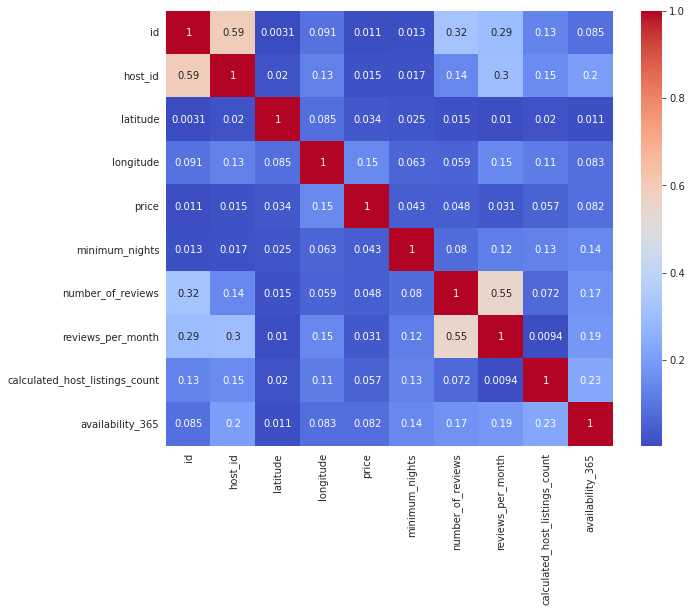

In [198]:
#correlation Through heatmap
plt.figure(figsize=(10,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')



Each Features are -vly corelated with each other..

## Data Cleaning

#### Handling Nan and missing Values

In [199]:
df_1 = df.copy()

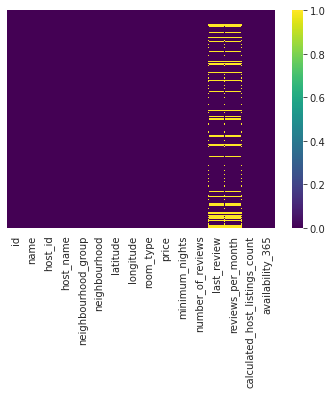

In [200]:
#checking null values
sns.heatmap(df.isnull(),yticklabels = False,cmap = 'viridis')

In [201]:
#we are droping the last review as it contain large number of null
df_1.drop('last_review',axis = 1 ,inplace = True)


In [202]:
# finding mean of reviews per month
mean = df_1['reviews_per_month'].mean()

In [203]:
#replacing Nan values with mean in reviews_per_month
df_1.fillna({'reviews_per_month':mean}, inplace=True)


In [204]:
#replacing 'null' value with unknown 
df_1['name'].fillna('unknown',inplace = True)
df_1['host_name'].fillna('unknown_host',inplace =True)


In [205]:
#checking the null value
df_1.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

We have completly removed the missing values and Nan values from the given dataframe

###Handling Outliers

#### Price 

Price is one of the most importtant features so lets consider it briefly

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


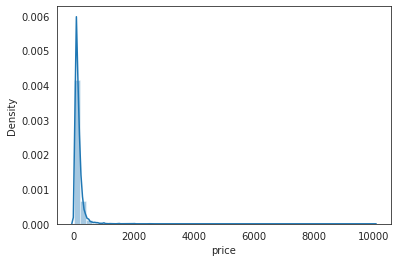

In [206]:
#distribution plot of price
sns.distplot(df_1['price'], hist = True)

In [207]:
#skewness and kurtosis
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 19.119027
Kurtosis: 585.636608


From the distribution plot and from the value of skewness and kurtosis, we can say that our value have the sharpe edge and there is too much of the outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


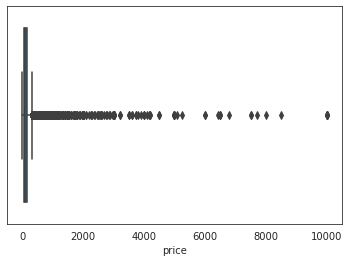

In [208]:
#boxplot of price
sns.boxplot(df_1['price'])

**There is presence of the outliers so we need to remove the outlie, Through IQR**

#### IQR

In [209]:
#defining outlier's range function function
def df_range(col):
  sorted(col)
  Q1,Q3 = np.percentile(col , [25,75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
 
  return lower_range,upper_range


#### Price

In [210]:
#getting_upper,lower bound
lower_bound,upper_bound = df_range(df_1['price'])
#removing outlier on the basis of the  lower bound, upper bound
df_1.drop(df_1[ (df_1.price > upper_bound) | 
              (df_1.price < 1) ].index , inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


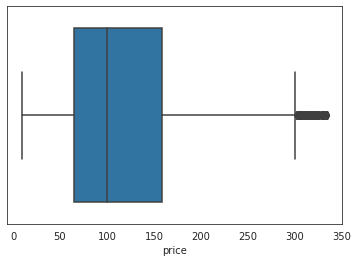

In [211]:
#boxplot of price
sns.boxplot(df_1['price'])

#### Coordinates

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


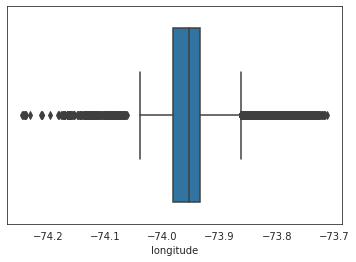

In [212]:
#ploting longitude
sns.boxplot(df_1['longitude'])

It contain a lot of outliers but we will not make any changes to it

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


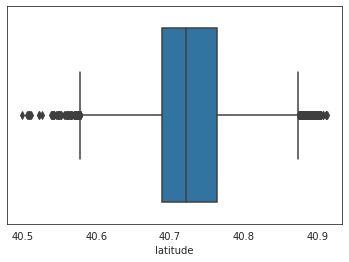

In [213]:
#ploting latitude
sns.boxplot(df_1['latitude'])

It contain a lot of outliers but we will not make any changes to it

## Visual Analysis

#### Top ten Neighborhood

In [214]:
#checking top 10 neighbourhoods on the basis of no of listings in entire NYC!
top_neigbours= df.groupby('neighbourhood').id.count().sort_values(ascending = False).reset_index().rename(columns = 
                                                                                                          {'id':'Count',
                                                                                                           'neighbourhood':'Neighbourhood'})
top_neigbours['Percentage'] = round(top_neigbours['Count']/(top_neigbours['Count'].sum())*100,2)
top_10_neigbours = top_neigbours[:10]
top_10_neigbours
#plt.xlabel('neighbourhood')
#plt.ylabel('counts in entire NYC')
#plt.title('Top neighbourhoods in entire NYC on the basis of count')

,Neighbourhood,Count,Percentage
0,Williamsburg,3919,8.02
1,Bedford-Stuyvesant,3710,7.59
2,Harlem,2658,5.44
3,Bushwick,2462,5.04
4,Upper West Side,1971,4.03
5,Hell's Kitchen,1958,4.01
6,East Village,1853,3.79
7,Upper East Side,1798,3.68
8,Crown Heights,1564,3.20
9,Midtown,1545,3.16


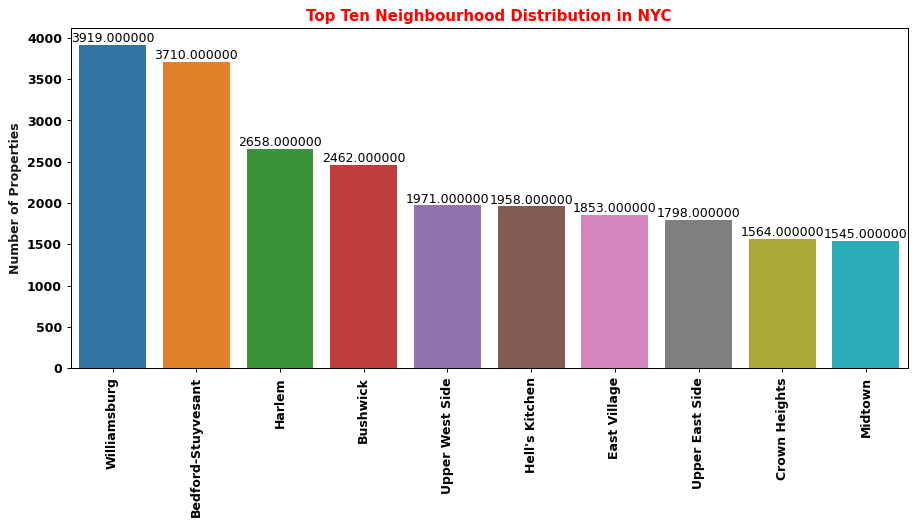

In [215]:
#Barplot o
plt.figure(figsize =(12,5),dpi = 90)
plt.style.use('default')
ax = sns.barplot(x = 'Neighbourhood',y = 'Count',data = top_10_neigbours)
plt.title('Top Ten Neighbourhood Distribution in NYC',weight = 'bold',c = 'red',fontsize = 12)
plt.xlabel("",weight ='bold',c = 'k')
plt.xticks(rotation = 90,weight = 'bold')
plt.ylabel('Number of Properties',weight = 'bold',c='k')
plt.yticks(weight = 'bold')
for i in ax.patches:
  ax.annotate('{:0f}'.format(i.get_height()),(i.get_x() + 0.4, i.get_height()),
              ha = 'center',va = 'bottom')
plt.show()


##### Top 10 most Poular Host

We can find the popular hotel on the basis of availabilty and number of review

In [216]:
#copying the dataframe
df_365 = df.copy()

In [217]:
 #Checking availability
 df_365=df[df['availability_365'] == 0]

In [218]:
#geting the popular host
popular_hosts = df_365.groupby(['host_name',
                                'host_id',
                                'room_type',
                                'price'])['number_of_reviews'].max().reset_index()
popular_hosts = popular_hosts.sort_values(by='number_of_reviews', ascending=False).head(10).reset_index()
popular_hosts[['host_name','room_type','price']]

,host_name,room_type,price
0,Wanda,Private room,60
1,Gurpreet Singh,Private room,50
2,Deloris,Private room,65
3,Veronica,Private room,53
4,James,Entire home/apt,325
5,Kyle,Private room,99
6,Dragan,Private room,109
7,Kc,Private room,72
8,Karen,Private room,47
9,Brian,Private room,140


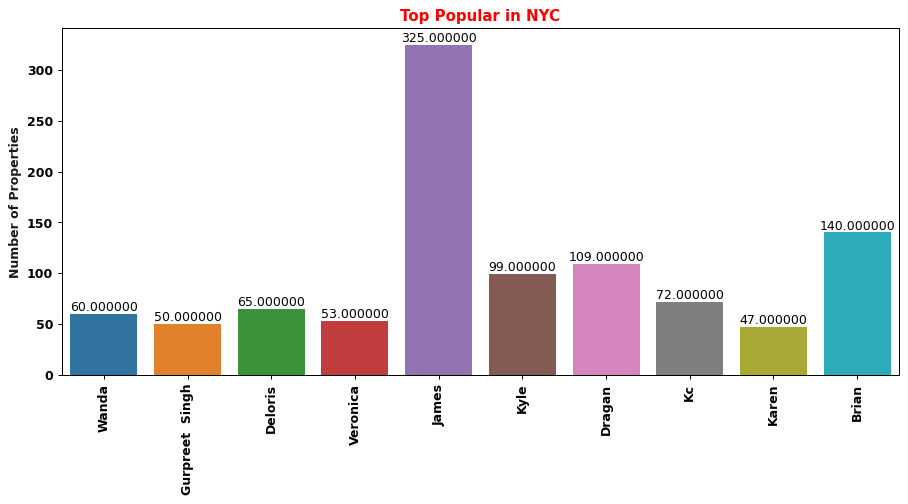

In [219]:
#Barplot o
plt.figure(figsize =(12,5),dpi = 90)
plt.style.use('default')
ax = sns.barplot(x = 'host_name',y = 'price',data = popular_hosts)
plt.title('Top Popular in NYC',weight = 'bold',c = 'red',fontsize = 12)
plt.xlabel("",weight ='bold',c = 'k')
plt.xticks(rotation = 90,weight = 'bold')
plt.ylabel('Number of Properties',weight = 'bold',c='k')
plt.yticks(weight = 'bold')
for i in ax.patches:
  ax.annotate('{:0f}'.format(i.get_height()),(i.get_x() + 0.4, i.get_height()),
              ha = 'center',va = 'bottom')
plt.show()


#### Minimum_nights vs price

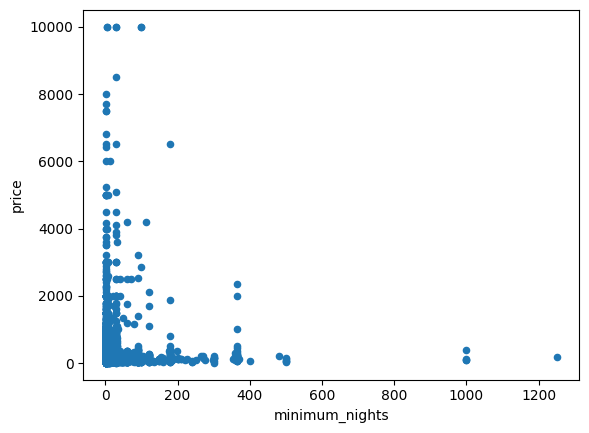

In [220]:
# #price vs minimum night
df.plot.scatter(x='minimum_nights',y = 'price')

we can clearly see from scatter plot that minimum night is inversely proportional to price..

#### Rooms Types Count in each Neighbourhood Group

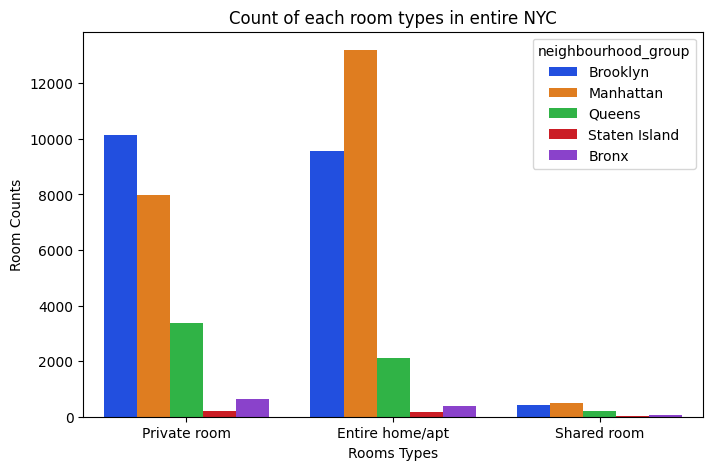

In [221]:
#rooms type count in different neighbourhood group
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['figure.figsize'] = (8, 5)
ax= sns.countplot(x='room_type',hue='neighbourhood_group',data=df, palette='bright')
plt.title('Count of each room types in entire NYC')
plt.xlabel('Rooms Types')
plt.ylabel('Room Counts')

plt.show()

We can analyse that **Entire home/ apt** are highest number in count and **Shared room** are in least number.And **Manhattan** has the highest number of airbnb in NYC wherein **Staten Island** has the lowest count of airbnb

#### Neighboor_group vs Price

[Text(0, 0, 'Brooklyn'),
 Text(0, 0, 'Manhattan'),
 Text(0, 0, 'Queens'),
 Text(0, 0, 'Staten Island'),
 Text(0, 0, 'Bronx')]

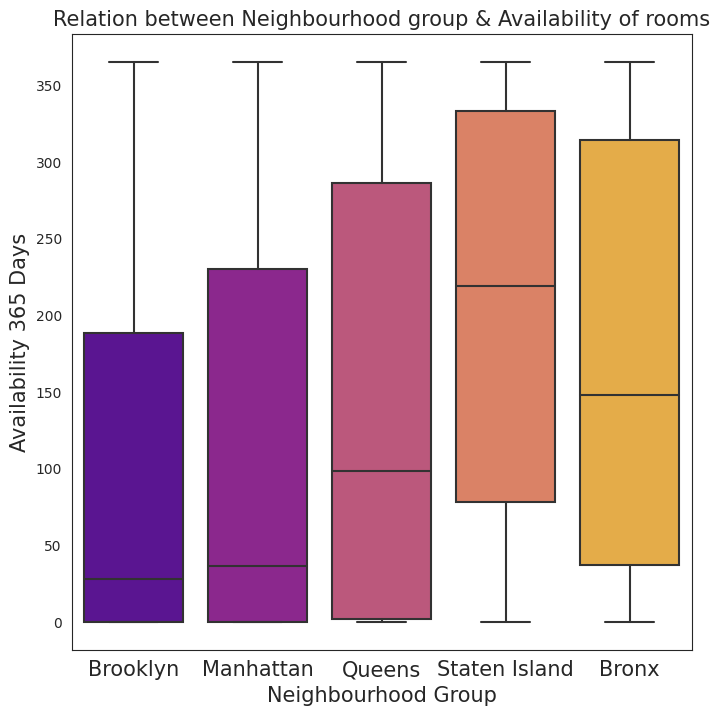

In [222]:
#ploting different location and price
plt.figure(figsize=(8,8))
sns.set_style('white')

ax = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette='plasma')

# Naming the Chart
ax.set_title('Relation between Neighbourhood group & Availability of rooms').set_fontsize('15')

# Naming X & Y axis
ax.set_ylabel('Availability 365 Days').set_fontsize('15')
ax.set_xlabel('Neighbourhood Group').set_fontsize('15')

#Adjusting Bar labels
ax.set_xticklabels(ax.get_xticklabels(), size = '15')

 From violin plot we can assume that *Brooklyn* has the least number of the availability followed by Manhattan wherein *Staten Island* has least busy airbnb followed by Bronx

#### Top Neignbourhood with Respect to Average Price.

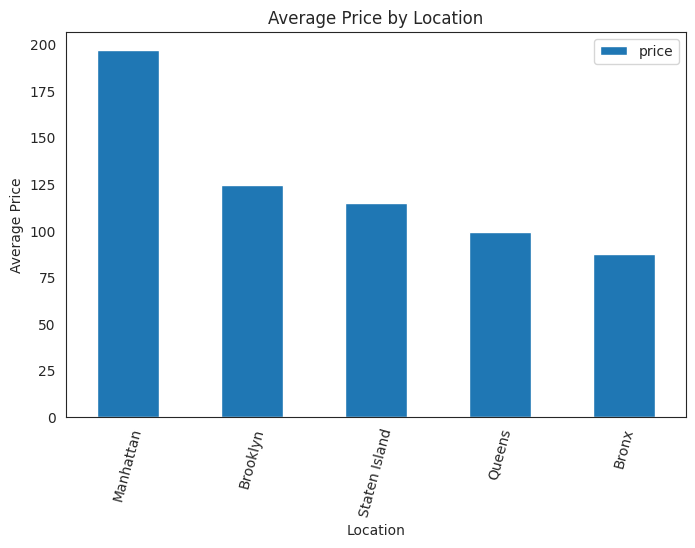

In [223]:
#Grouping by neighbourhood group and price with mean value
df_ngrp= df.groupby(['neighbourhood_group'])['price'].mean().reset_index().sort_values(by='price',ascending=False)
df_ngrp.plot(y='price',x='neighbourhood_group',kind='bar',rot = 75)
plt.title('Average Price by Location')
plt.xlabel('Location')
plt.ylabel('Average Price')

plt.show()

From the Given plot, we can verfify that **average price** of **Manhattan** is higher wherein **Bronx** has the lowest average value and **Queens** and **Staten Island**  has almost same average price..

#### Most 5 Expensive hotel

In [224]:
#geting the top 5 expensive hotel
expensive = df.sort_values(by='price',ascending=False)[['name','price']][:5].reset_index()
expensive[['name','price']]

,name,price
0,1-BR Lincoln Center,10000
1,Luxury 1 bedroom apt. -stunning Manhattan views,10000
2,Furnished room in Astoria apartment,10000
3,"Quiet, Clean, Lit @ LES & Chinatown",9999
4,2br - The Heart of NYC: Manhattans Lower East ...,9999


#### Most Cheap Hotels

In [225]:
expensive = df.sort_values(by='price',ascending=False)[['name','price']][-5:].reset_index()
expensive[['name','price']]

,name,price
0,IT'S SIMPLY CONVENIENT!,10
1,Gigantic Sunny Room in Park Slope-Private Back...,10
2,Couch in Harlem Harvey Refugees only,10
3,"Quiet, Cozy UES Studio Near the Subway",10
4,Bronx Apart,10


#### Min and Max price in each neighboourhood_group


In [226]:
#getting highest price in each location
costliest_hotel_df= df.groupby('neighbourhood_group',
                               as_index = False)['price'].max().sort_values(['price'],ascending = False).rename(columns = {'price':'Maximum Price',
                                                                                                                                                 'neighbourhood_group':'Location'})
costliest_hotel_df

,Location,Maximum Price
1,Brooklyn,10000
2,Manhattan,10000
3,Queens,10000
4,Staten Island,5000
0,Bronx,2500


In [227]:
#getting lowest price in each location
cheapest_hotel_df =df.groupby('neighbourhood_group',as_index = False)['price'].min().sort_values(['price'],ascending = True).rename(columns = {'price':'Minimum Price',
                                                                                                                                                 
                                                                                                                                                  'neighbourhood_group':'Location'})
cheapest_hotel_df 

,Location,Minimum Price
0,Bronx,10
1,Brooklyn,10
2,Manhattan,10
3,Queens,10
4,Staten Island,13


In [228]:
#merging the cheapest_hotel and costliest hostel 
min_max_price = pd.merge(cheapest_hotel_df,costliest_hotel_df,on = 'Location')
min_max_price

,Location,Minimum Price,Maximum Price
0,Bronx,10,2500
1,Brooklyn,10,10000
2,Manhattan,10,10000
3,Queens,10,10000
4,Staten Island,13,5000


So the minimum airbnb price in new york is $10 and maximum price is 10000 and cheapest area is Bronx... 

#### Number of neighbourhoods in each neighbourhood group

In [229]:
#getting the numbers of neighbourhoods in the respective neighbourhood group
neighbourhood = df.groupby(['neighbourhood_group'])['neighbourhood'].nunique().sort_values(ascending=False)
number_of_neighbourhood = neighbourhood.to_frame(name='Number of neighbouthoods').reset_index()
number_of_neighbourhood

,neighbourhood_group,Number of neighbouthoods
0,Queens,51
1,Bronx,48
2,Brooklyn,47
3,Staten Island,43
4,Manhattan,32


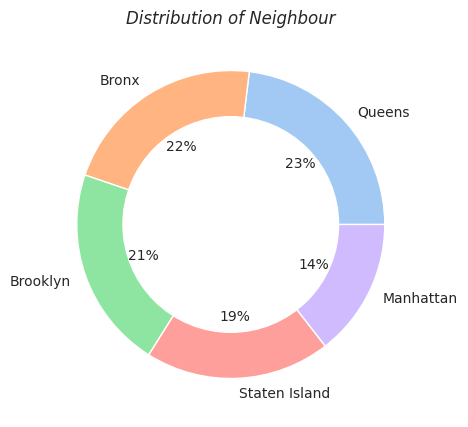

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns

#define data
data = number_of_neighbourhood
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
my_circle = plt.Circle( (0,0), 0.7, color='white')

plt.pie(data['Number of neighbouthoods'], labels = data['neighbourhood_group'], colors = colors, autopct='%.0f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Distribution of Neighbour',style = 'oblique')
plt.show()

**Queens** has the higest neighbourhood group and **Manhattan** with the least..

#### Prices of Room Type in neignbourhood group

Text(0.5, 1.0, 'Average Price by Location')

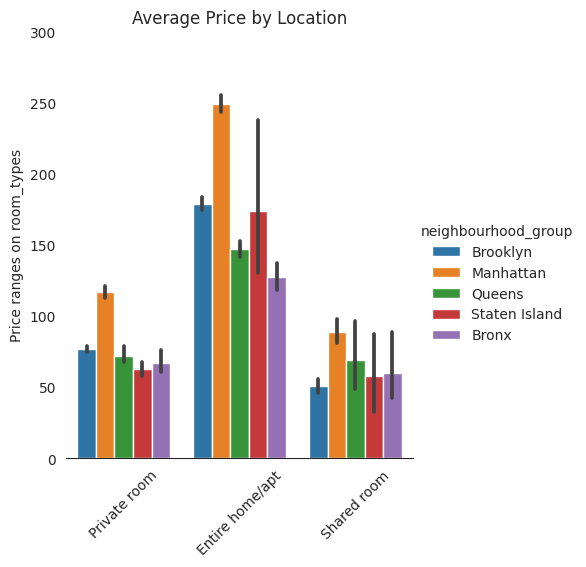

In [231]:
#room_type vs price
g = sns.catplot(x="room_type", y="price", hue="neighbourhood_group",
                data=df, saturation=.8,
                kind="bar",  aspect=.9)
(g.set_axis_labels("", "Price ranges on room_types")
  .set_xticklabels(["Private room", "Entire home/apt", "Shared room"],rotation=45)
  .set(ylim=(0, 300))
  .despine(left=True)) 
plt.title('Average Price by Location')


From the grpah we can say that **Manhattan** has higest number of airbnb wherein **Bronx** has the lowest. Most people loves to live in **private room** and **Shared room** is least prefered..

#### Average Rate of Room Types in different Location

Text(0.5, 0, 'Location')

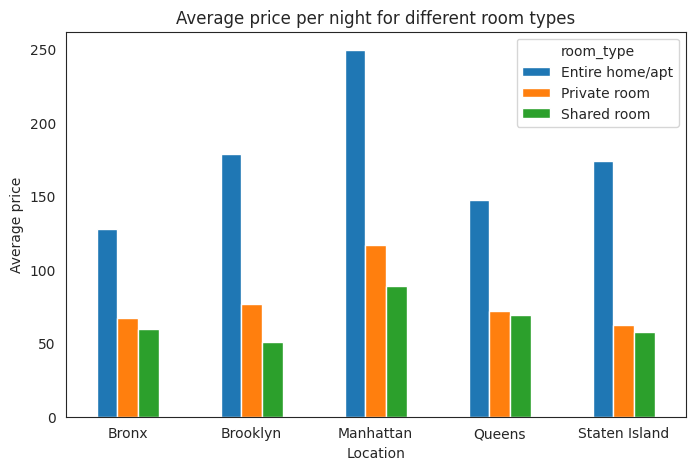

In [232]:
#getting the average rent for different room types
room_type_price = df.groupby(['neighbourhood_group',
                              'room_type'])['price'].mean().unstack()
room_type_price.plot(kind='bar', rot=360)
plt.title('Average price per night for different room types')
plt.ylabel('Average price')
plt.xlabel('Location')


Our graph is tellling us that **Manhattan** is the most expensive Location and **Bronx** is the lowest wherein **Shared room** are the cheapest and **Enitre Home/apt** is the most costliest in average..

#### Most Review RoomType Vs Neighbourbood Groups

In [233]:
#reviews
#top 5 most reviewed listings in NYC!
top10_reviewed_listings= df.nlargest(5,'reviews_per_month')
top10_reviewed_listings[['name','reviews_per_month','neighbourhood_group']].reset_index()


,index,name,reviews_per_month,neighbourhood_group
0,42075,Enjoy great views of the City in our Deluxe Room!,58.50,Manhattan
1,42076,Great Room in the heart of Times Square!,27.95,Manhattan
2,38870,Lou's Palace-So much for so little,20.94,Queens
3,27287,JFK Comfort.5 Mins from JFK Private Bedroom & ...,19.75,Queens
4,28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,17.82,Queens


Text(0.5, 1.0, 'Most 5 Reviewed Hotels')

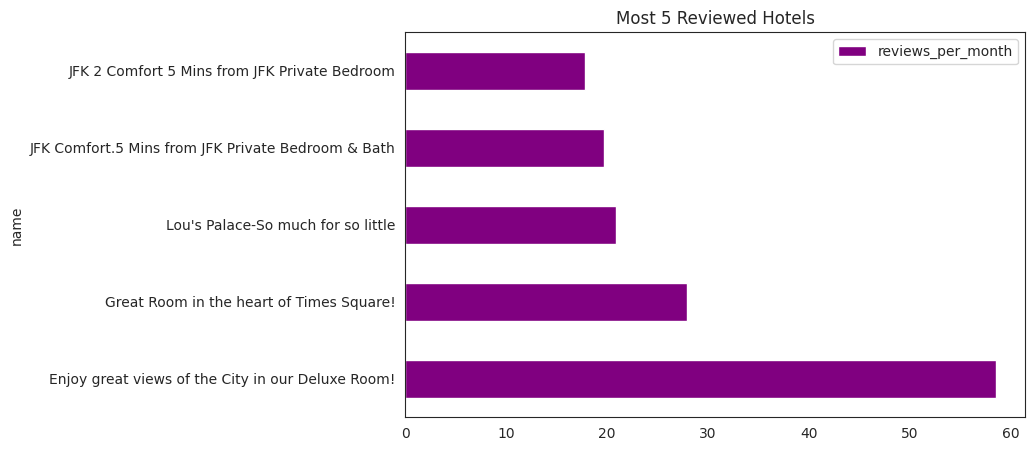

In [234]:
#ploting hotel names with msot number of review per month
top10_reviewed_listings.plot(x='name',y='reviews_per_month',kind='barh',color='purple')
plt.title("Most 5 Reviewed Hotels")

So 'Enjoy great views of the City in our Deluxe Room!' is the most review room in NYC...


#### Number of Hotels or Aparments in each Neighbourhood Groups

In [235]:
# Number of hotel  in each locality
number_of_neighbourhood = df.groupby('neighbourhood_group')['neighbourhood'].count()
number_of_neighbourhood

neighbourhood_group
Bronx             1090
Brooklyn         20095
Manhattan        21660
Queens            5666
Staten Island      373
Name: neighbourhood, dtype: int64

Text(0.5, 1.0, 'Number of Hotels/Apartment in each neighborhood group')

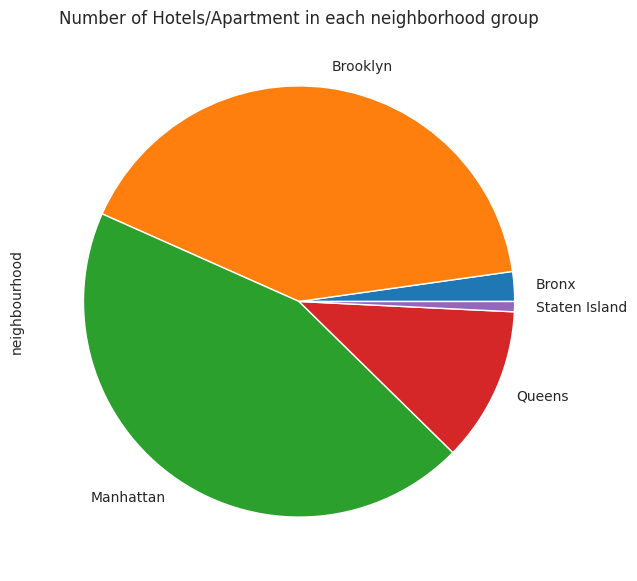

In [236]:
#number of hotel in each neighbourhood group
number_of_neighbourhood.plot(kind='pie',figsize=(7,7))
plt.title('Number of Hotels/Apartment in each neighborhood group')

So **Manhattan** has the highest number of hotels and Staten Island has the lowest number of hotesls

#### Number of Reviewed Room Types in Each Neighbourhood Groups

Text(0.5, 1.0, 'Number of Reviewed room_types in each Neighbourhood Groups')

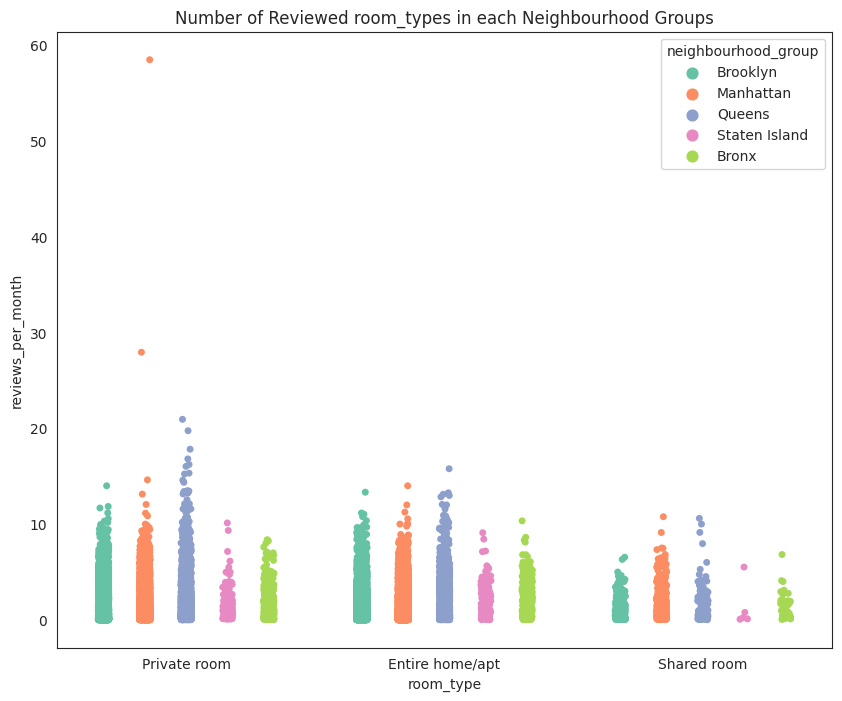

In [237]:
#ploting number of review vs Each neighbourhood Groups
f,ax = plt.subplots(figsize=(10,8))
ax= sns.stripplot(x='room_type',
                  y='reviews_per_month',
                  hue='neighbourhood_group',dodge=True,
                  data=df,palette='Set2')
ax.set_title(
    'Number of Reviewed room_types in each Neighbourhood Groups')

So airbnb in **Queen** is reviewed most in and **Staten Island** is reviewed least. And **private room** is reviewed most and **Shared room** is reviewed least..

#### Top  3 Host by Review

Text(0.5, 1.0, 'Top hosts by Reviews/Month\n')

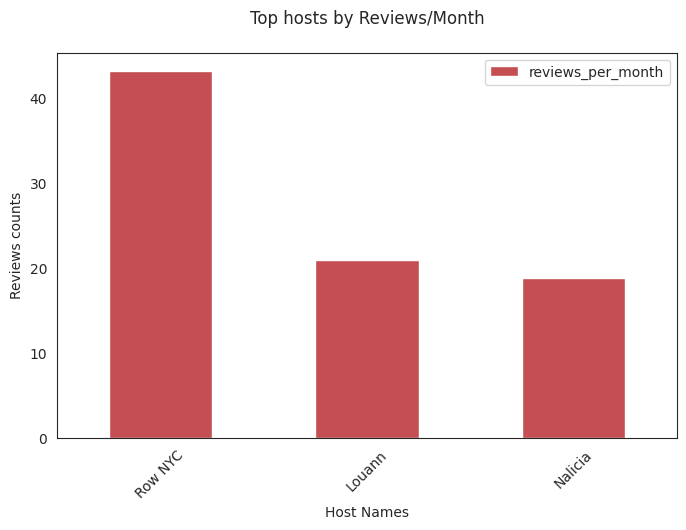

In [238]:
#there are cases where same hosts are hosting multiple properties in same/different areas.
reviews_df=top10_reviewed_listings.groupby(['host_name'])['reviews_per_month'].mean()
reviews_df=reviews_df.reset_index().sort_values(by='reviews_per_month',ascending=False)
reviews_df.plot(x='host_name',y='reviews_per_month',kind='bar',color='r',rot = 45)
plt.ylabel('Reviews counts')
plt.xlabel('Host Names')
plt.title('Top hosts by Reviews/Month\n')

**Row NYC** is reviewed most..

#### Top 10 Host with most properties

In [239]:
#getting top 5 most listed host name
host_with_most_listings= df.groupby(['host_name'])['calculated_host_listings_count'].sum().reset_index()
largest_listings_df= host_with_most_listings.nlargest(5,'calculated_host_listings_count').reset_index()


Text(0.5, 1.0, 'Top hosts by Most Number of Listing\n')

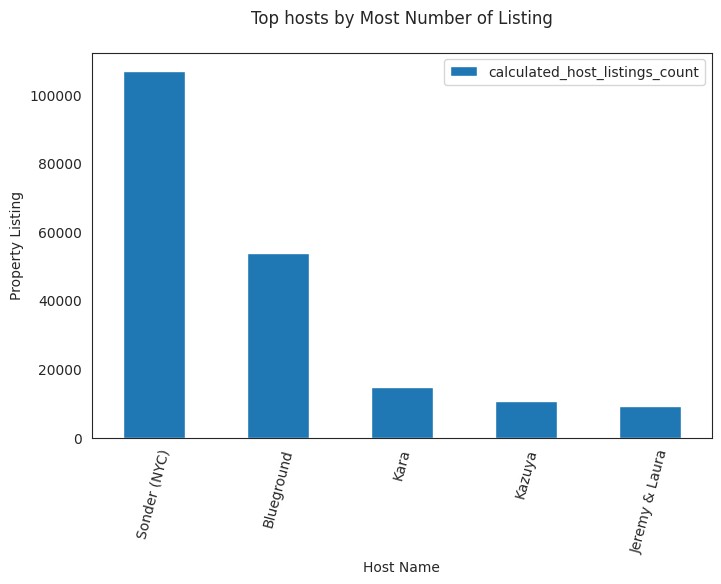

In [240]:
#ploting the top listed host name
largest_listings_df.plot(x='host_name',y='calculated_host_listings_count',kind='bar',rot = 75)
plt.xlabel('Host Name')
plt.ylabel('Property Listing')
plt.title('Top hosts by Most Number of Listing\n')

**Sonder(NYC)** is has the higest number of properties...

#### Latitude and longitude


Text(0.5, 1.0, 'Location Co-ordinates')

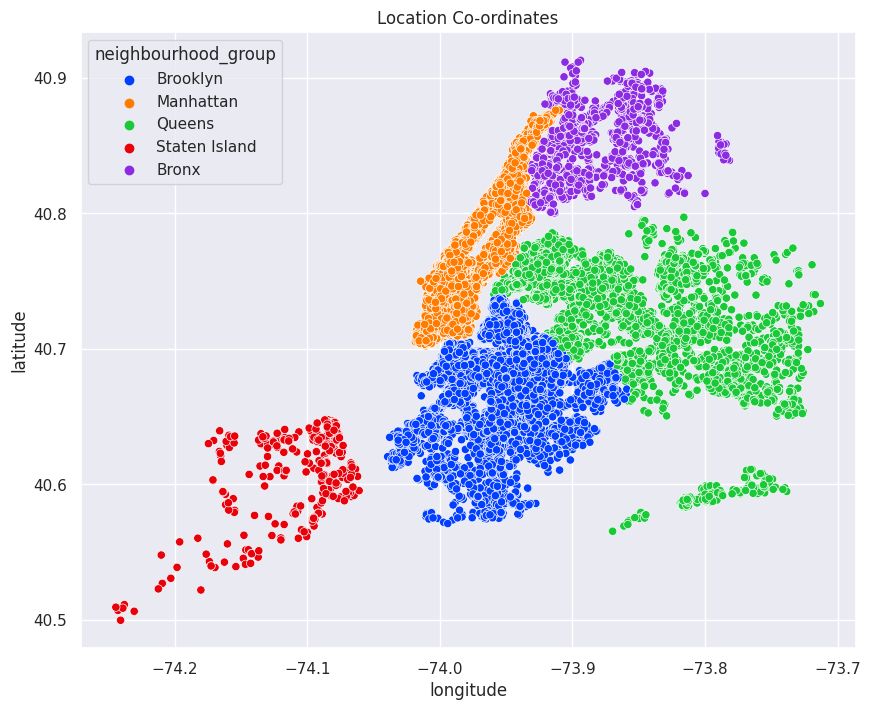

In [241]:
#ploting the coordinates
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(data=df, x="longitude", y="latitude",hue='neighbourhood_group',palette='bright')
ax.set_title('Location Co-ordinates')

Text(0.5, 1.0, 'Distribution of type of rooms across NYC')

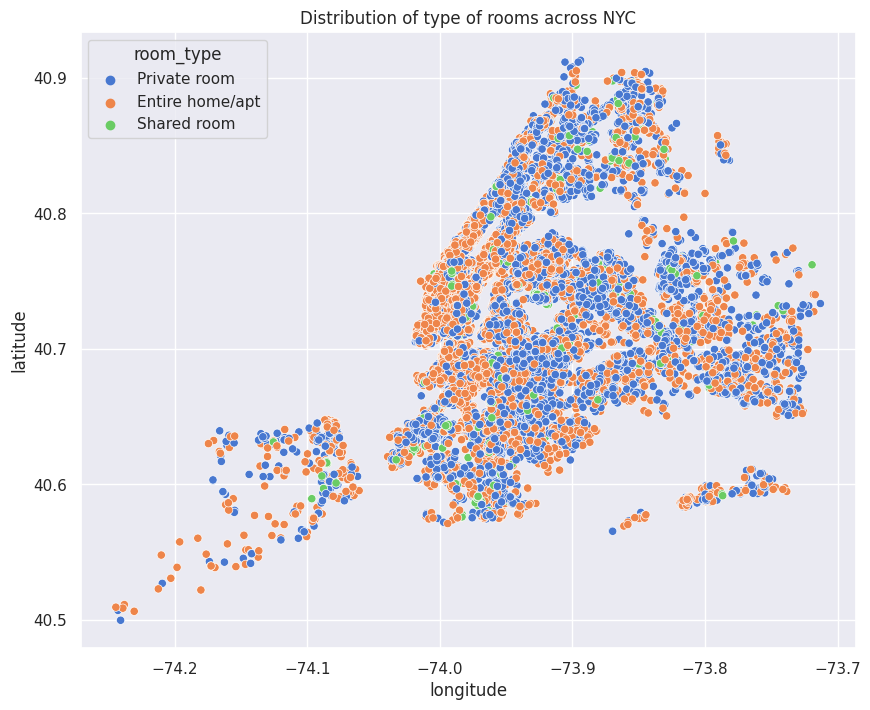

In [242]:
#room type distribution across NYC
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(x=df.longitude, y=df.latitude,hue=df.room_type,
                    palette='muted')
ax.set_title('Distribution of type of rooms across NYC')

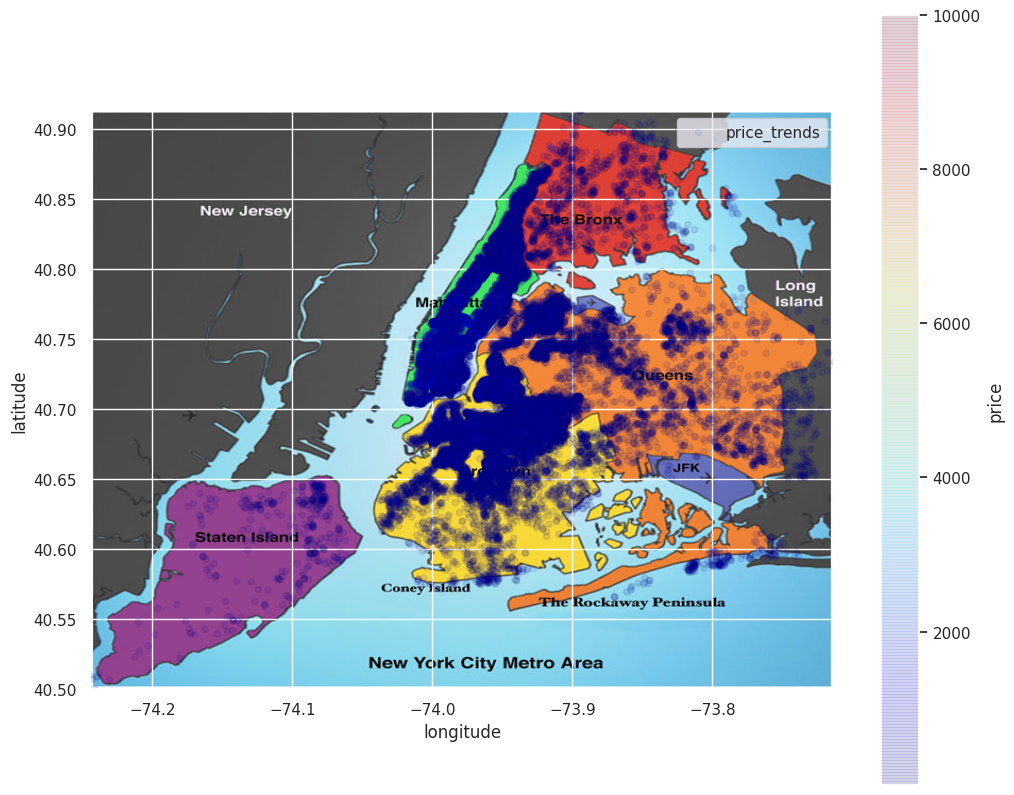

In [243]:
# ploting the price trends in the map 
plt.figure(figsize=(12,10))
img=plt.imread('/content/drive/MyDrive/AlmaBetter/6_the-rockaway-penisula-map.jpg.crdownload')
plt.imshow(img,zorder=0,extent=[df['longitude'].min(),df['longitude'].max(),df['latitude'].min(),df['latitude'].max()])
ax = plt.gca()
df.plot(kind='scatter', x='longitude', y='latitude', label='price_trends', c='price',ax=ax,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.1, figsize=(12,10))
plt.legend()
plt.show()

## Conclusion

We have sucessfully explore the airbnb NYC dataset by removing the outliers,Null and Nan values. We have found the trends and patterns between the different features.Some of the outcome from analysis are as follows:-
* **Minimum Night** is inversely proportional to the price
* **Entire home/ apt** are highest in number 
* **Shared room** are least in number thats why reviewed least
* **private room** is most reviewed
* **Manhattan** has the highest number of airbnb in NYC with most review and highest average price but with the lowest number of neigbourhood.
* **Staten Island** has the lowest count of airbnb and least reviewed but has the higest number of room availability
* **Bronx** has the a chapest airbnb
* **Queens**  has the higest number of neighborhood
* **Enjoy great views of the City in our Deluxe Room** is most reviewed airbnb
* **Brooklyn** the lowest number of availabilty
* **Row NYC** host is reviewed most

### Advice
* They need to focus more on Entire room & Apartment types as they are bringing the more revenue than than room types in average.
* To increase the **revenue**, they need to bring the availability to least and this can be done when they will make **minimum night** to the least
* Shared Room are cheap and they are not reviewed more so company should focus on getting more reviewed and talk with host

